In [1]:
import time

import torch
from torch.utils.data import DataLoader

from prob import VRPDataset
from solver import sweepHeuristic, cwHeuristic, googleOR, amVRP
from utils import routesPlot, checkValid

Using backend: pytorch


In [2]:
# load data
data = VRPDataset(size=50, distr="cluster", num_samples=10000)

In [3]:
def run(solver):
    cnt = 0
    for ins in data:
        cnt += 1
        # get info
        depot = ins["depot"].detach().numpy()
        loc = ins["loc"].detach().numpy()
        demand = ins["demand"].detach().numpy()
        # run solver
        prob = solver(depot, loc, demand)
        tick = time.time()
        routes, obj = prob.solve()
        tock = time.time()
        # print results
        print("Obj Val: {:.4f}".format(obj))
        print("Routes:")
        for r in routes:
            print("  ", "->".join(map(str, r)))
        print("Time elpased: {:.4f} sec".format(tock - tick))
        # check valid
        assert checkValid(routes, depot, loc, demand), "Infeasible solution."
        # vis
        routesPlot(routes, depot, loc)
        # stop
        if cnt >= 3:
            break
        print()

Obj Val: 12.3523
Routes:
   2->5->43->9->31->48->27
   18->29->39->14->25->36->15->33->17
   44->45->37->21->10->11
   16->1->47->12->41->34->32->4->30
   22->7->40->0->8->42->19
   49->46->28->24->20->26
   35->13->6->3->23->38
Time elpased: 1.6113 sec


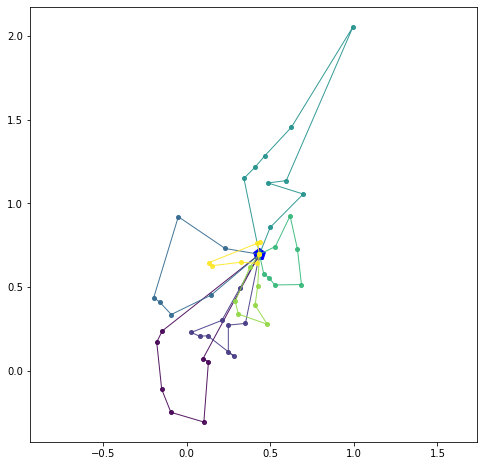


Obj Val: 10.8858
Routes:
   3->36->33->6->39->32->43->35
   37->41->21->10->47->4->16
   48->45->46->31->38->5->27->2
   22->20->26->49->18->40->8->1
   25->12->19->29->23->34->30->11
   17->7->42->44->28
   14->0->9->15->13->24
Time elpased: 1.6053 sec


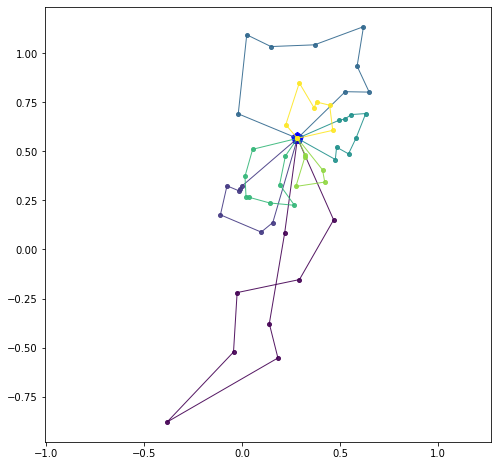


Obj Val: 10.8070
Routes:
   44->7->45->31->47->21->6->49->35
   39->20->24->22->18->26->3->19->2->41
   0->8->25->13->11->48->32->28
   10->1->40->15->5->37
   16->27->30->29->34->14
   12->9->17->4->23->43->42
   36->46->33->38
Time elpased: 1.6183 sec


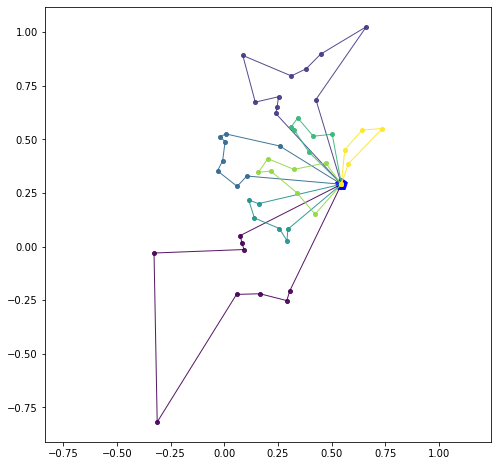

In [4]:
run(cwHeuristic)

Set parameter Username
Academic license - for non-commercial use only - expires 2021-12-31
Obj Val: 14.5000
Routes:
   19->8->42->1->41->34->12->16
   35->13->47->32->4->30->45->44
   3->6->37->21->10->23
   11->27->48->15->36->26
   25->31->9->2->33->17
   20->29->5->43->39->24->38
   49->46->18->14->28->7->22
   40->0
Time elpased: 0.1740 sec


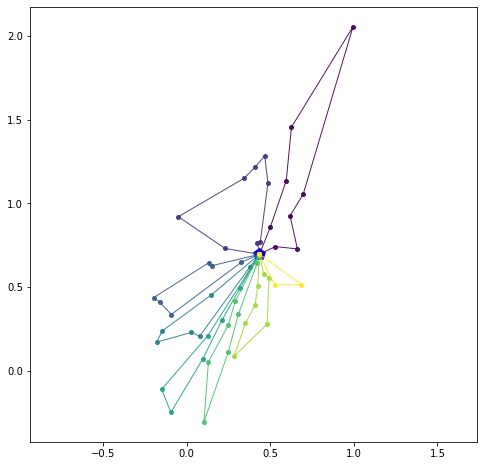


Obj Val: 11.8499
Routes:
   0->2->5->38->31->9->15
   24->13->46->45->48->25
   12->10->47->21->41->37
   11->29->19->6->32->4->23
   30->16->39->33->36->43->3->34->42
   17->7->28->44->35->22->26->20
   14->49->18->40->8->1
   27
Time elpased: 0.1770 sec


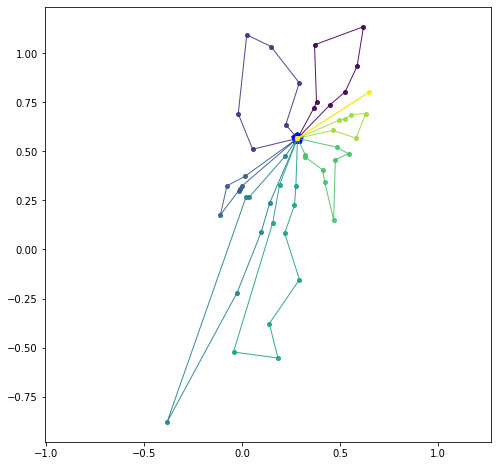


Obj Val: 12.5371
Routes:
   36->33->46->2->19->41->16->38
   3->26->18->24->20->30->27->12
   14->34->29->39->22->32->28
   9->17->11->48->13->4->23
   0->8->25->21->1->10->43
   37->15->40->35->49->6->31->5
   42->45->47->7->44
Time elpased: 0.1480 sec


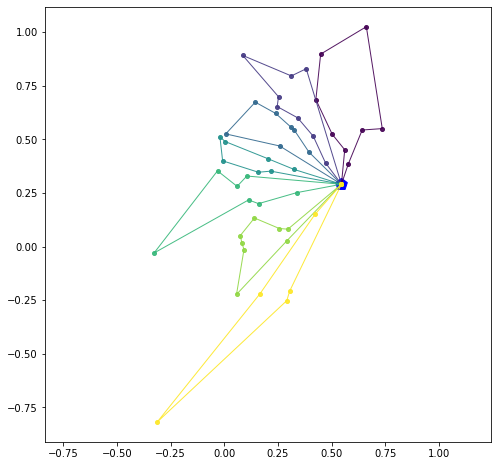

In [5]:
run(sweepHeuristic)

Obj Val: 12.7796
Routes:
   28->14->43->9->31->2->5->39
   20->29->36->15->48->27->10
   13->16->47->30->45->37->21->23
   44->6->3->11->25->33->17
   19->8->0->40->7->22
   42->1->12->41->34->32->4->35
   38->49->46->18->24->26
Time elpased: 0.1250 sec


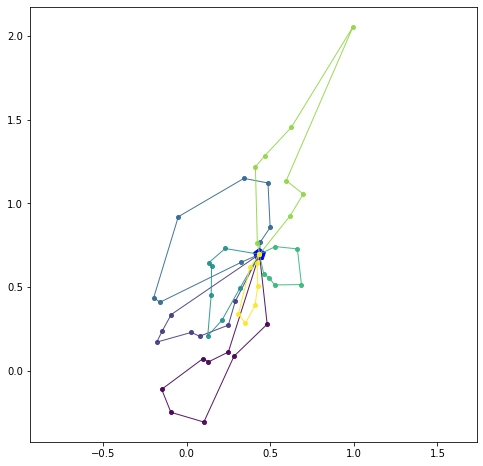


Obj Val: 10.7726
Routes:
   17->7->28->44->35->3->34->42
   43->36->33->6->39->32->4->16->23
   24->48->25->12->29->30->11
   13->46->45->31->38->5->0
   19->47->10->21->41->37
   15->9->2->27->18->40->8->1
   14->49->26->22->20
Time elpased: 0.1660 sec


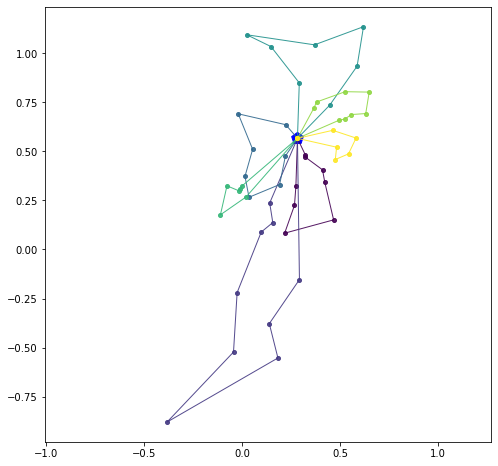


Obj Val: 11.2608
Routes:
   37->15->45->31->47->21->6->49->35->40
   42->5->7->44
   39->20->24->26->3->19->2->18->22->28
   23->4->0->1->10->43
   46->33->41->30->29->34
   8->25->13->11->48->32->17->9
   36->38->16->27->14->12
Time elpased: 0.1210 sec


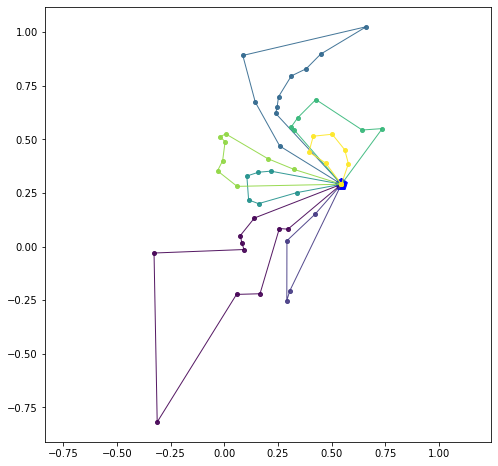

In [6]:
run(googleOR)

  [*] Loading model from ./attention_model/pretrained_vrp/vrp_50\epoch-99.pt
Obj Val: 14.5474
Routes:
   16->47->30->4->32->12->1->42->19
   8->34->41->43->9->31->48->2->29
   0->28->14->39->5->25->36
   7->40->46->49->22->38
   18->24->33->20->26
   17->15->27->10->11->3
   23->6->21->37->45->44->35->13
Time elpased: 1.4933 sec


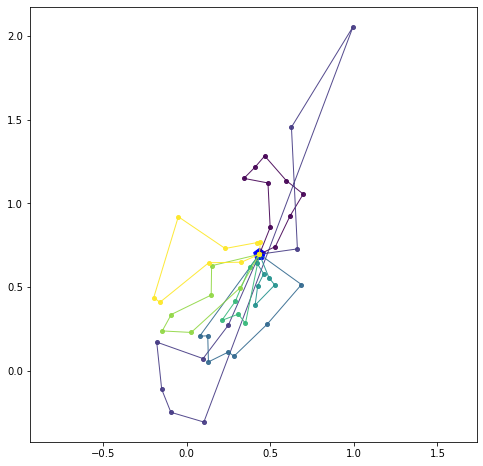


Obj Val: 11.3178
Routes:
   13->46->45->31->38->5->27->18
   15->9->0->2->40->8->1
   14->20->49->26->22->28->17
   44->35->33->6->39->36->32->43->34
   42->3->16->4->23->30->7
   29->19->47->10->21->37
   41->12->25->48->24->11
Time elpased: 0.0780 sec


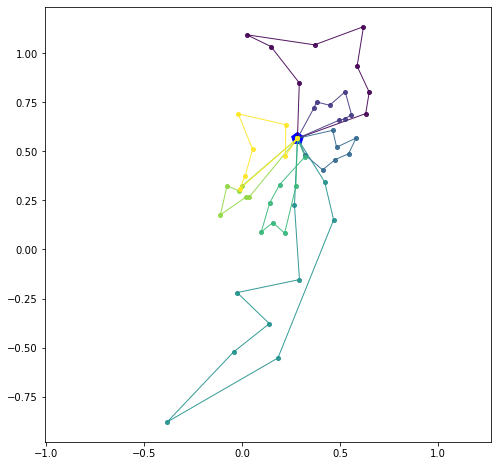


Obj Val: 11.2368
Routes:
   44->7->45->47->21->31->6->49->35->37
   42->5->15->40->10->43
   1->8->25->13->0->4->23->9
   17->11->48->32->22->39->29
   28->20->24->26->18->19->2->3->41->30
   12->14->34->27->16->38
   36->33->46
Time elpased: 0.0750 sec


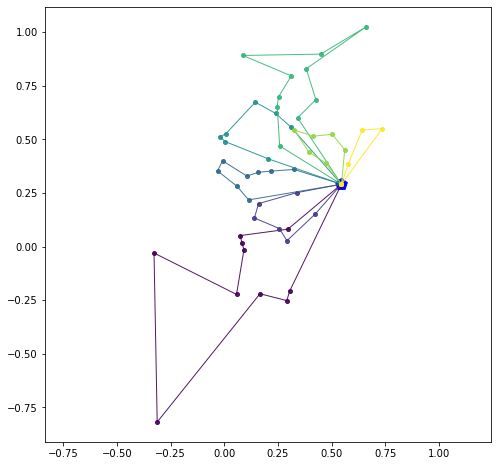

In [7]:
cnt = 0
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
dataloader = DataLoader(data, batch_size=1, shuffle=False)
prob = amVRP(size=50)
for ins in dataloader:
    cnt += 1
    # get info
    ins["depot"] = ins["depot"].to(device)
    ins["loc"] = ins["loc"].to(device)
    #ins["demand"][:,:] = 0
    ins["demand"] = ins["demand"].to(device)
    # run solver
    tick = time.time()
    routes, obj = prob.solve(ins)
    routes, obj = routes[0], obj[0]
    tock = time.time()
    # print results
    print("Obj Val: {:.4f}".format(obj))
    print("Routes:")
    for r in routes:
        print("  ", "->".join(map(str, r)))
    print("Time elpased: {:.4f} sec".format(tock - tick))
    # check valid
    depot = ins["depot"].cpu().detach().numpy()[0]
    loc = ins["loc"].cpu().detach().numpy()[0]
    demand = ins["demand"].cpu().detach().numpy()[0]
    assert checkValid(routes, depot, loc, demand), "Infeasible solution."
    # vis
    routesPlot(routes, depot, loc)
    # stop
    if cnt >= 3:
        break
    print()